In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
SAVE_NAME = 'trainValidSplit'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

In [5]:
train_label = pd.read_csv('./csv/trainMatrix.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt9604418,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9648786,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9382590,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9504436,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tt9848240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt8236848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
tt7866714,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
tt8364418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
val_label = pd.read_csv('./csv/validMatrix.csv')
val_label = val_label.set_index('id')
val_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt5611432,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
tt6870808,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
tt7961060,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
tt7978752,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
tt2396489,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9740064,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt9747894,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt9799044,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data = pd.read_csv('./csv/computed_2018.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,B_avg_norm,B_std_norm,C_avg_norm,C_std_norm,D_avg_norm,D_std_norm
Movie,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.007298,0.023854,0.006342,0.000935,0.445638,0.832754,0.533451,0.483734
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.014906,0.051871,0.000902,0.000357,0.132108,0.423395,0.327074,0.210562
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.001307,0.004485,0.002749,0.000840,0.355463,0.806169,0.227029,0.218672
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.002679,0.008711,0.005097,0.002367,0.418481,0.819104,0.261399,0.346838
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.000813,0.008520,0.009969,0.003081,0.392654,0.779089,0.264322,0.251708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.016593,0.025089,0.000883,0.000279,0.153606,0.422083,0.345005,0.390481
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.008615,0.015923,0.001512,0.000333,0.077689,0.200329,0.107595,0.147131
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.001412,0.006139,0.006461,0.001811,0.322074,0.712302,0.275013,0.305507


In [9]:
test_data = pd.read_csv('./csv/computed_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,B_avg_norm,B_std_norm,C_avg_norm,C_std_norm,D_avg_norm,D_std_norm
Movie,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.191448e+07,3.059149e+07,0.245187,0.249696,3839.297159,3297.384679,0.071101,0.066649,0.031517,0.040032,0.452157,0.471848,0.379584,0.835915
adogsjourneymovie,34.632479,29.109753,2.695759e+06,4.626123e+06,0.335291,0.348500,3266.022091,2096.407257,0.069522,0.097831,0.006578,0.005443,0.718553,0.868171,0.291833,0.363484
aftermathmovie,35.692308,26.611911,7.428488e+05,1.455065e+06,0.204024,0.259721,3211.875123,2616.735866,0.079233,0.083045,0.001295,0.001219,0.330456,0.512062,0.283545,0.568167
aftermovie,58.276596,54.904056,5.679151e+06,1.419376e+07,0.212422,0.231199,3176.910267,2106.883693,0.286168,0.250527,0.014649,0.018188,0.355284,0.397654,0.278193,0.367605
alitamovie,35.784314,29.192272,2.569164e+06,6.429860e+06,0.266729,0.269028,2843.780762,2350.997308,0.080076,0.098320,0.006235,0.007846,0.515845,0.549392,0.227201,0.463632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.260180e+06,6.481499e+06,0.175488,0.220206,3454.562570,3247.741628,0.146285,0.238378,0.005400,0.007915,0.246087,0.353559,0.320693,0.816387
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,0.046198,0.041692,0.053489,0.069564,0.441256,0.517072,0.711315,0.554604
wonderparkmovie,27.282443,13.193380,1.571109e+08,4.445462e+08,0.430486,0.331031,5563.594289,2771.415032,0.002175,0.003610,0.424310,0.591465,1.000000,0.798101,0.643522,0.629013


In [10]:
val_data = train_data.loc[val_label.index, :]
train_data = train_data.drop(val_label.index)
print(train_data.shape, val_data.shape, test_data.shape)
print(train_label.shape, val_label.shape, test_label.shape)

(972, 16) (433, 16) (97, 16)
(972, 20) (433, 20) (97, 20)


In [20]:
train_x = train_data.iloc[:, 8:].to_numpy()
val_x = val_data.iloc[:, 8:].to_numpy()
test_x = test_data.iloc[:, 8:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(972, 8) (972, 20)
(433, 8) (433, 20)
(97, 8) (97, 20)


In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (8, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

Using TensorFlow backend.
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/py

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
Total params: 12,148
Trainable params: 12,148
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 972 samples, validate on 433 samples
Epoch 1/100
972/972 [==============================] - 1s 769us/step - loss: 0.6405 - acc: 0.7809 - val_loss: 0.5181 - val_acc: 0.8605
Epoch 2/100
972/972 [==============================] - 0s 60us/step - loss: 0.4133 - acc: 0.8761 - val_loss: 0.2902 - val_acc: 0.9066
Epoch 3/100
972/972 [==============================] - 0s 58us/step - loss: 0.3476 - acc: 0.8847 - val_loss: 0.2848 - val_acc: 0.9066
Epoch 4/100
972/972 [==============================] - 0s 59us/step - loss: 0.3422 - acc: 0.8847 - val_loss: 0.2831 - val_acc: 0.9066
Epoch 5/100
972/972 [==============================] - 0s 60us/step - loss: 0.3410 - acc: 0.8847 - val_loss: 0.2826 - val_acc: 0.9066
Epoch 6/100
972/972 [==============================] - 0s 59us/step - loss: 0.3396 - acc: 0.8847 - val_loss: 0.2815 - val_acc: 0.9066
Epoch 7/100
972/972 [==============================] - 0s 60us/step - loss: 0.3388 - acc: 0.8847 - va

In [24]:
# save model weights
model.save(WEIGHTS_SAVE)

In [25]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

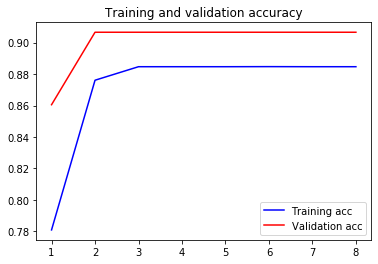

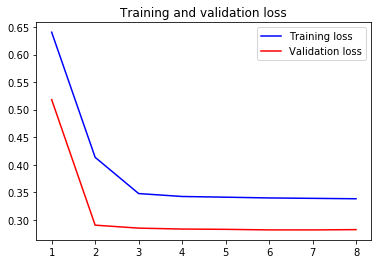

In [26]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [27]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 195us/step


In [28]:
pred.shape

(97, 20)

In [29]:
results=pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [30]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.099481,0.076033,0.071517,0.073590,0.123511,0.073532,0.063063,0.441977,0.070699,...,0.078826,0.065912,0.069544,0.073783,0.074021,0.062261,0.072046,0.073611,0.070258,0.071783
1,adogsjourneymovie,0.109238,0.089327,0.081130,0.071332,0.132244,0.084557,0.071387,0.436790,0.077173,...,0.085794,0.066166,0.069346,0.083799,0.088026,0.069987,0.078294,0.081643,0.078258,0.071363
2,aftermathmovie,0.108613,0.086803,0.083861,0.085184,0.134401,0.082865,0.074451,0.445545,0.079276,...,0.085855,0.076868,0.081276,0.083225,0.083508,0.073641,0.083531,0.083530,0.080231,0.081804
3,aftermovie,0.089128,0.078172,0.073661,0.076985,0.127178,0.071764,0.064653,0.421489,0.071305,...,0.064095,0.065234,0.074334,0.070445,0.071463,0.065185,0.069097,0.065901,0.065436,0.068719
4,alitamovie,0.119667,0.097672,0.091808,0.089653,0.144378,0.092336,0.081839,0.441859,0.088356,...,0.094516,0.081262,0.085935,0.094056,0.094935,0.081047,0.089589,0.091208,0.088337,0.086679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.080391,0.065874,0.061796,0.067027,0.114781,0.061495,0.055756,0.429411,0.060640,...,0.059472,0.057907,0.064794,0.060833,0.061115,0.056612,0.060117,0.059463,0.057265,0.061283
93,whatmenwant,0.106782,0.081459,0.077490,0.077541,0.127532,0.080706,0.063548,0.432955,0.076099,...,0.081514,0.067571,0.070594,0.076468,0.078569,0.062550,0.077862,0.079020,0.074394,0.074152
94,wonderparkmovie,0.101027,0.077923,0.067369,0.060556,0.118844,0.077018,0.060997,0.450649,0.076878,...,0.086053,0.053067,0.059228,0.071730,0.075038,0.053604,0.068545,0.070335,0.069503,0.063232
95,xmenmovies,0.112655,0.093158,0.085281,0.081591,0.139499,0.087486,0.075879,0.434711,0.083771,...,0.087645,0.073295,0.078685,0.088464,0.090086,0.075060,0.082017,0.083501,0.081812,0.078771


## Label top n dynamic

In [31]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,0.099481,0.076033,0.071517,0.073590,0.123511,0.073532,0.063063,0.441977,0.070699,0.072785,0.078826,0.065912,0.069544,0.073783,0.074021,0.062261,0.072046,0.073611,0.070258,0.071783
adogsjourneymovie,0.109238,0.089327,0.081130,0.071332,0.132244,0.084557,0.071387,0.436790,0.077173,0.078743,0.085794,0.066166,0.069346,0.083799,0.088026,0.069987,0.078294,0.081643,0.078258,0.071363
aftermathmovie,0.108613,0.086803,0.083861,0.085184,0.134401,0.082865,0.074451,0.445545,0.079276,0.084024,0.085855,0.076868,0.081276,0.083225,0.083508,0.073641,0.083531,0.083530,0.080231,0.081804
aftermovie,0.089128,0.078172,0.073661,0.076985,0.127178,0.071764,0.064653,0.421489,0.071305,0.076613,0.064095,0.065234,0.074334,0.070445,0.071463,0.065185,0.069097,0.065901,0.065436,0.068719
alitamovie,0.119667,0.097672,0.091808,0.089653,0.144378,0.092336,0.081839,0.441859,0.088356,0.092092,0.094516,0.081262,0.085935,0.094056,0.094935,0.081047,0.089589,0.091208,0.088337,0.086679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,0.080391,0.065874,0.061796,0.067027,0.114781,0.061495,0.055756,0.429411,0.060640,0.064543,0.059472,0.057907,0.064794,0.060833,0.061115,0.056612,0.060117,0.059463,0.057265,0.061283
whatmenwant,0.106782,0.081459,0.077490,0.077541,0.127532,0.080706,0.063548,0.432955,0.076099,0.078756,0.081514,0.067571,0.070594,0.076468,0.078569,0.062550,0.077862,0.079020,0.074394,0.074152
wonderparkmovie,0.101027,0.077923,0.067369,0.060556,0.118844,0.077018,0.060997,0.450649,0.076878,0.068287,0.086053,0.053067,0.059228,0.071730,0.075038,0.053604,0.068545,0.070335,0.069503,0.063232


In [33]:
labels = read_json('../genresDic.json')

In [34]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [35]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.0 ['Drama', 'Comedy', 'Biography'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
apollo11movie.m

In [36]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.000000,"[Horror, Mystery, Thriller]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [38]:
acc_df['acc'].mean()

0.3917525773195877